In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


All the columns has 7043 non-null values. No null values present.

Integer,float and object are the data types in the dataset.

SeniorCitizen and tenure is integer data type. MonthlyCharges is float data type and all other columns are of object data types.

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The TotalCharges has float values but it is showing object data type.

In [7]:
#Checking unique values in TotalCharges
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#Location empty string in TotalCharges
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Replacing empty string with nan
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [10]:
#Checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Converting TotalCharges to float and filling null value with mean.
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

TotalCharges data type changed to float.

In [13]:
#Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null value in the data set.

<AxesSubplot:>

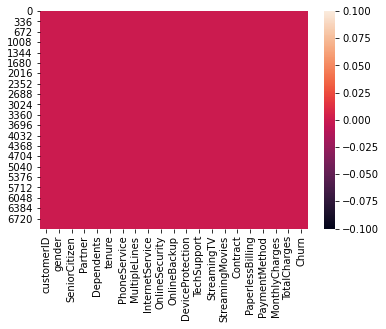

In [14]:
sns.heatmap(df.isnull())

# Data Visualization

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64

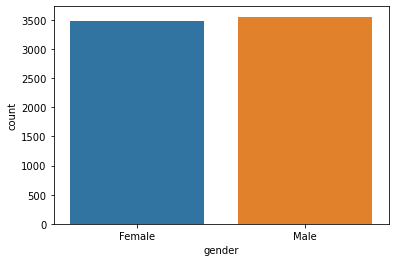

In [16]:
sns.countplot('gender',data=df)
df['gender'].value_counts()

In the gender column there are 3555 Male and 3488 Female.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

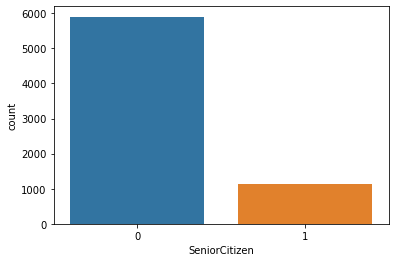

In [17]:
sns.countplot('SeniorCitizen',data=df)
df['SeniorCitizen'].value_counts()

In the SeniorCitizen, 5901 is not SeniorCitizen and 1142 of them are SeniorCitizen.

No     3641
Yes    3402
Name: Partner, dtype: int64

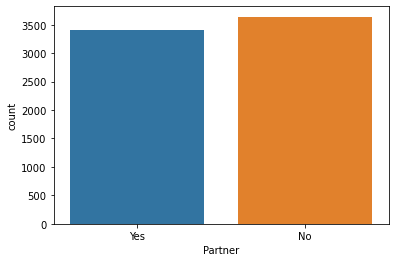

In [18]:
sns.countplot('Partner',data=df)
df['Partner'].value_counts()

3641 of them not having Partner,3402 having Partner.

No     4933
Yes    2110
Name: Dependents, dtype: int64

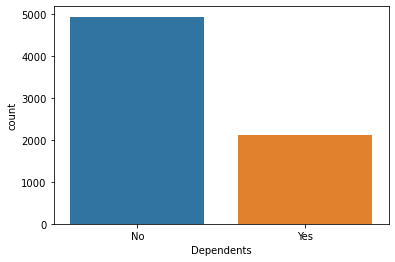

In [19]:
sns.countplot('Dependents',data=df)
df['Dependents'].value_counts()

4933 of them not have Dependents,2110 of them have Dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64

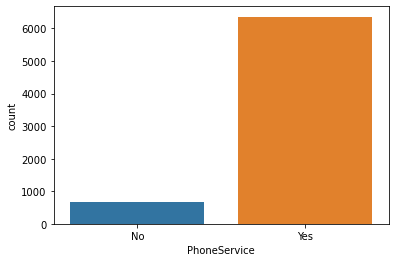

In [20]:
sns.countplot('PhoneService',data=df)
df['PhoneService'].value_counts()

Only 682 of them does not have Phone service,6361 of them have phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

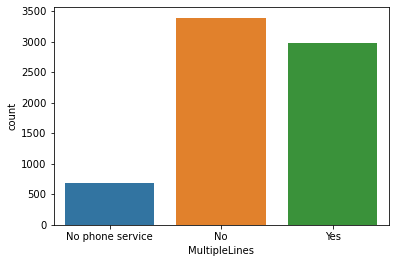

In [21]:
sns.countplot('MultipleLines',data=df)
df['MultipleLines'].value_counts()

In the column MultipleLInes, 3390 has no Multiplelines,2971 has Multiplelines and 682 has no phoneservice.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

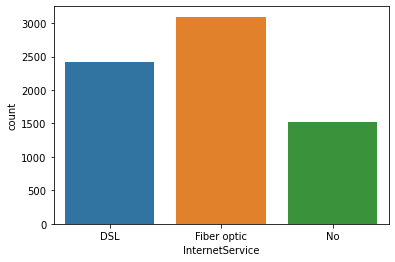

In [87]:
sns.countplot('InternetService',data=df)
df['InternetService'].value_counts()

In the column InternetService, 3096 has Fiber optic,2421 has DSL and 1526 has no service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

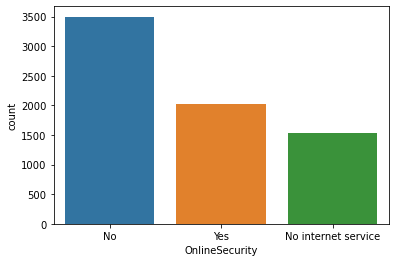

In [22]:
sns.countplot('OnlineSecurity',data=df)
df['OnlineSecurity'].value_counts()

In the OnlineSecurity column, 3498 has no security, 2019 has security and 1526 has no internet service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

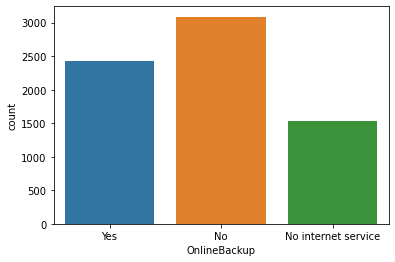

In [23]:
sns.countplot('OnlineBackup',data=df)
df['OnlineBackup'].value_counts()

3088 has no backup,2429 has backup and 1526 has no internet service.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

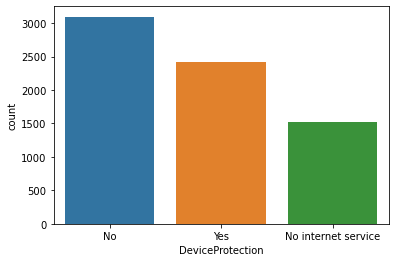

In [24]:
sns.countplot('DeviceProtection',data=df)
df['DeviceProtection'].value_counts()

3095 has no device protection and 2422 has device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

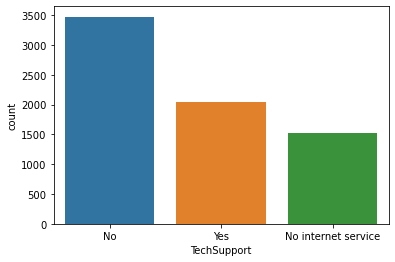

In [25]:
sns.countplot('TechSupport',data=df)
df['TechSupport'].value_counts()

3473 has no Techsupport and 2044 has Techsupport.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

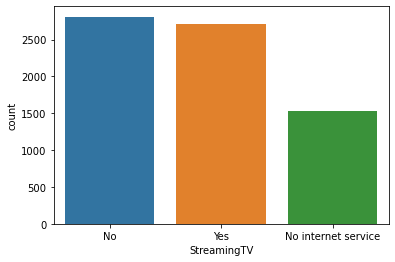

In [26]:
sns.countplot('StreamingTV',data=df)
df['StreamingTV'].value_counts()

2707 has StreamingTV and 2810 has no StreamingTV.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

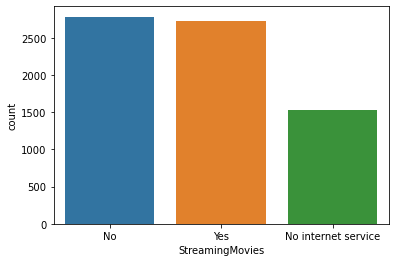

In [27]:
sns.countplot('StreamingMovies',data=df)
df['StreamingMovies'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

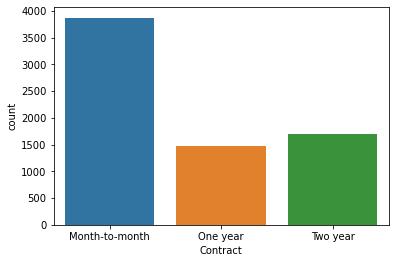

In [94]:
sns.countplot('Contract',data=df)
df['Contract'].value_counts()

In the contract column, 3875 of them are in month to month contract,1695 of them in two year contract and 1473 of them in one year contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

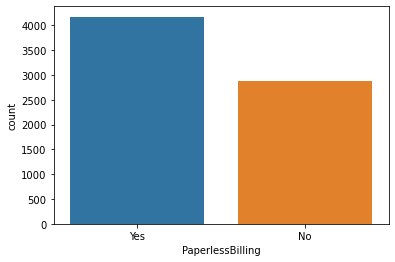

In [28]:
sns.countplot('PaperlessBilling',data=df)
df['PaperlessBilling'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

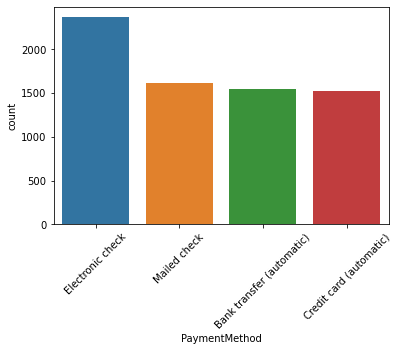

In [30]:
sns.countplot('PaymentMethod',data=df)
plt.xticks(rotation='45')
df['PaymentMethod'].value_counts()

In the payment column, 2365 of them paying by Electronic check,1612 of them by Mailed check, 1544 of them by Bank transfer and 1522 of them by Credit card.

No     5174
Yes    1869
Name: Churn, dtype: int64

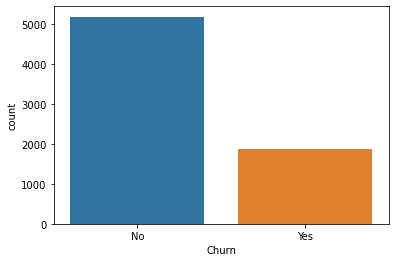

In [31]:
sns.countplot('Churn',data=df)
df['Churn'].value_counts()

<AxesSubplot:xlabel='Churn', ylabel='count'>

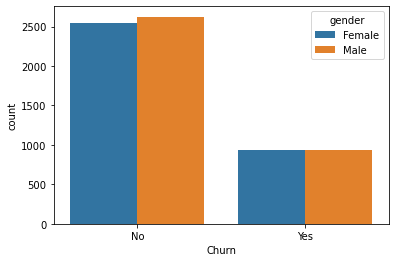

In [32]:
sns.countplot(x='Churn',hue='gender',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

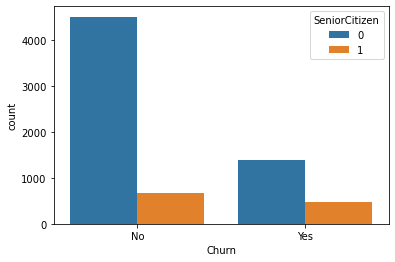

In [33]:
sns.countplot('Churn',hue='SeniorCitizen',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

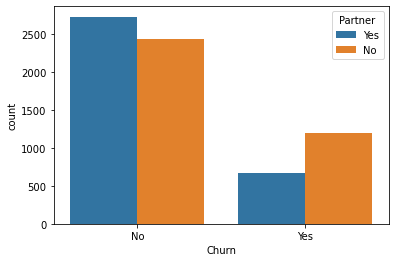

In [34]:
sns.countplot('Churn',hue='Partner',data=df)


<AxesSubplot:xlabel='Churn', ylabel='count'>

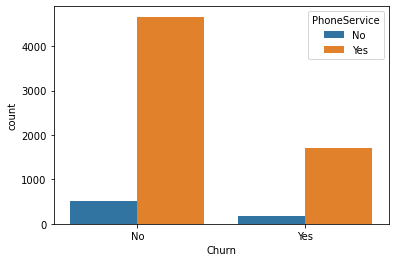

In [35]:
sns.countplot('Churn',hue='PhoneService',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

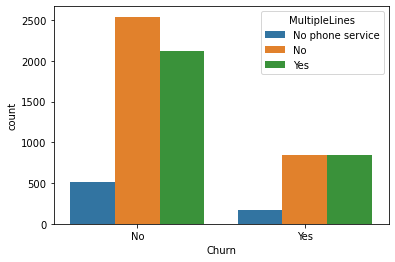

In [36]:
sns.countplot('Churn',hue='MultipleLines',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

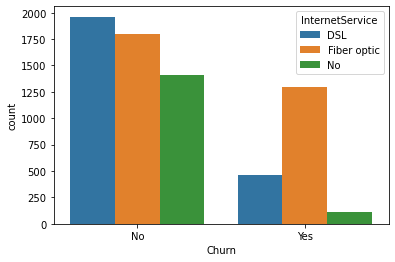

In [37]:
sns.countplot('Churn',hue='InternetService',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

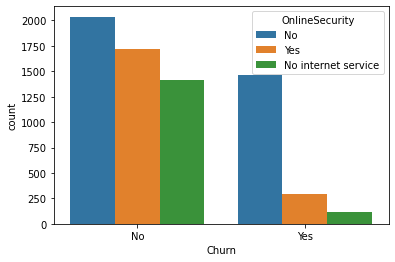

In [38]:
sns.countplot('Churn',hue='OnlineSecurity',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

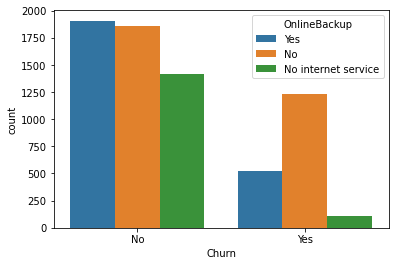

In [39]:
sns.countplot('Churn',hue='OnlineBackup',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

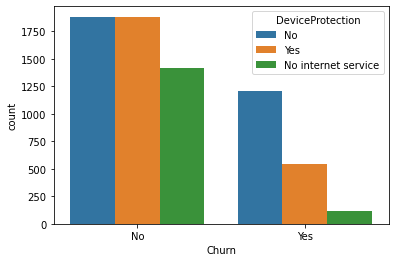

In [40]:
sns.countplot('Churn',hue='DeviceProtection',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

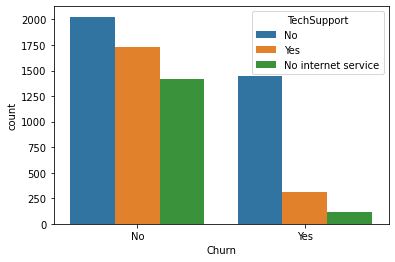

In [41]:
sns.countplot('Churn',hue='TechSupport',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

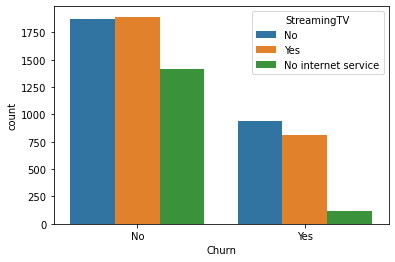

In [42]:
sns.countplot('Churn',hue='StreamingTV',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

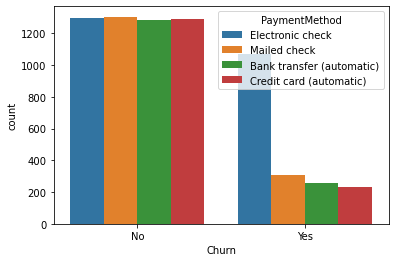

In [43]:
sns.countplot('Churn',hue='PaymentMethod',data=df)

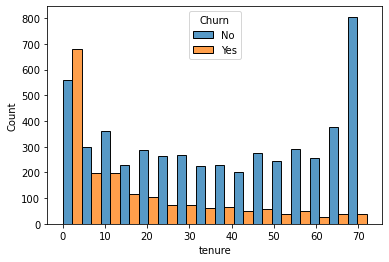

In [44]:
ax=sns.histplot(x='tenure',hue='Churn',data=df,multiple='dodge')

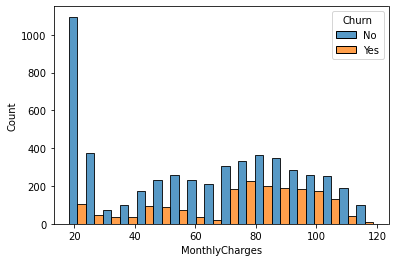

In [45]:
ax=sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

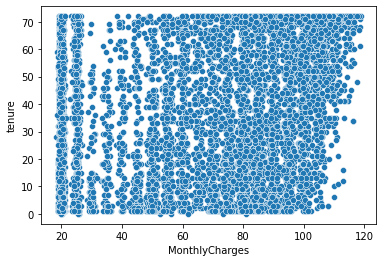

In [46]:
sns.scatterplot('MonthlyCharges','tenure',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

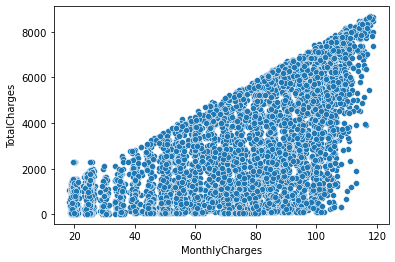

In [47]:
sns.scatterplot('MonthlyCharges','TotalCharges',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

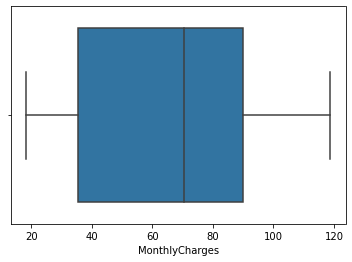

In [48]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='tenure'>

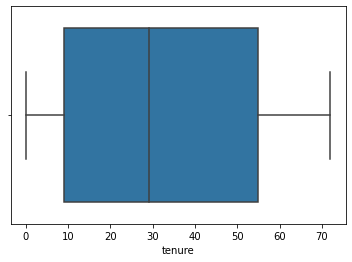

In [49]:
sns.boxplot(df['tenure'])

<AxesSubplot:xlabel='TotalCharges'>

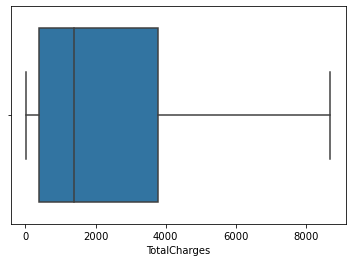

In [50]:
sns.boxplot(df['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

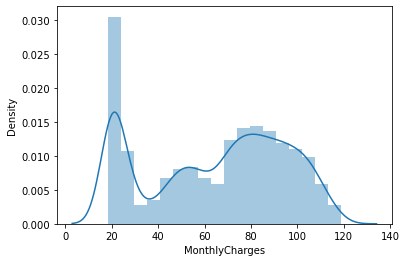

In [51]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

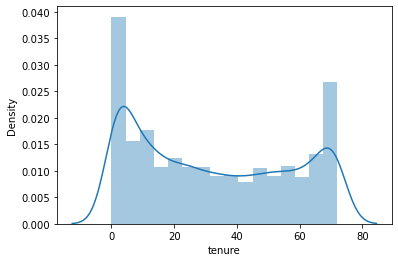

In [52]:
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

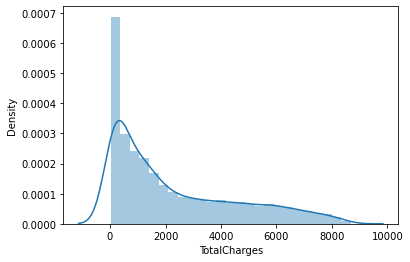

In [53]:
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

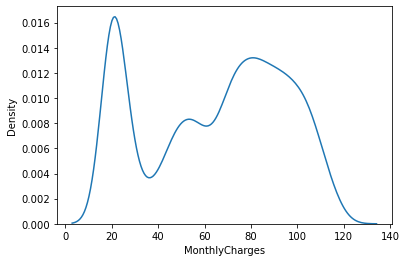

In [54]:
sns.kdeplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

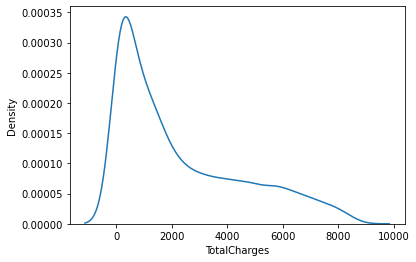

In [55]:
sns.kdeplot(df['TotalCharges'])

In [56]:
#Encoding
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [58]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [59]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

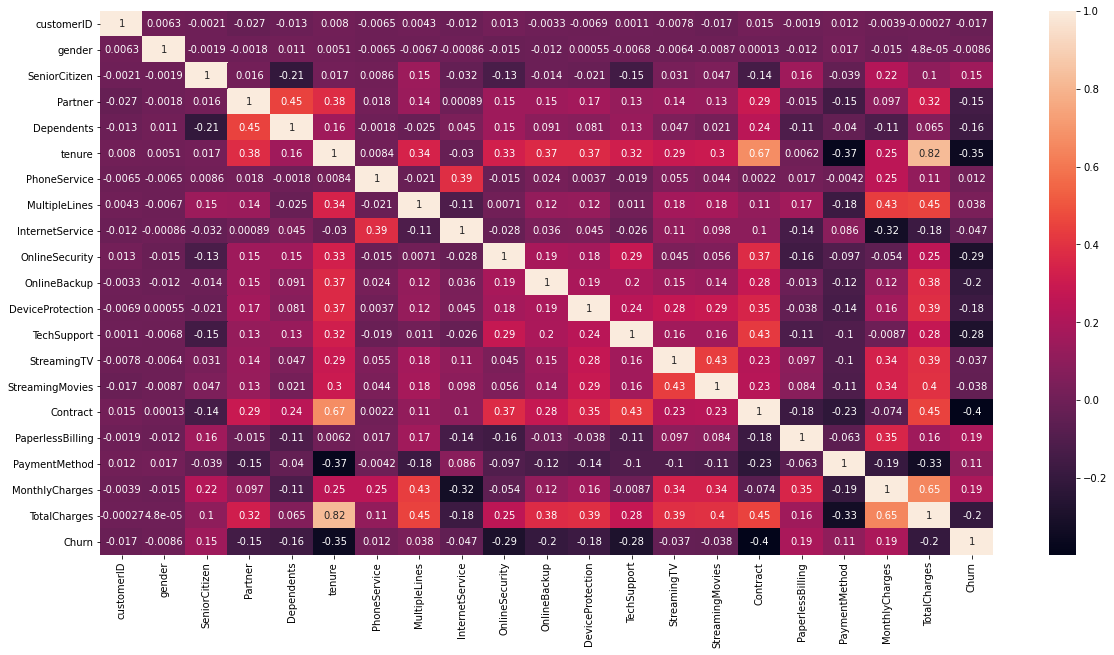

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

The target Churn is positively correlated to SeniorCitizen,PhoneService,MultipleLines,PaperlessBilling,PaymentMetohd and MonthlyCharges. 

The target Churn negatively correlated to gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract and TotalCharges.

In [61]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Skewness is looking good.

In [62]:
#Customer id not needed removing customer ID
df=df.drop('customerID',axis=1)

In [63]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [64]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (6361, 20)


In [65]:
dataloss=((7403-6361)/7043)*100
dataloss

14.79483174783473

14.79 Data loss after outlier remooval.

In [66]:
# Separating dependent and independent variables

X=df.drop('Churn',axis=1)
Y=df['Churn']
print(X.shape)
print(Y.shape)

(6361, 19)
(6361,)


In [67]:
Y.value_counts()

0.0    4662
1.0    1699
Name: Churn, dtype: int64

The target column is imbalanced, need to balance.

In [68]:
#balancing using SMOTE
from imblearn.over_sampling import SMOTE

smt=SMOTE()
x,y=smt.fit_resample(X,Y)
y.value_counts()

0.0    4662
1.0    4662
Name: Churn, dtype: int64

Target is balanced.

In [69]:
X=x
Y=y

In [70]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,1.005239,gender
1,1.092368,SeniorCitizen
2,1.489732,Partner
3,1.385310,Dependents
4,9.258304,tenure
5,40.048469,PhoneService
6,1.459817,MultipleLines
7,1.468290,InternetService
8,1.329390,OnlineSecurity
9,1.278927,OnlineBackup


Multicollinearity in PhoneService and TotalCharges.

In [71]:
#Dropping PhoneService in X.
X=X.drop(['PhoneService'],axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0,0.0,0.0,34,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
1,1.0,0,0.0,0.0,2,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
2,0.0,0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
3,0.0,0,0.0,0.0,8,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50
4,1.0,0,0.0,1.0,22,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40


In [72]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.52189055,
        0.01533003],
       ...,
       [0.        , 0.        , 0.        , ..., 0.87372755, 0.52464966,
        0.00602092],
       [1.        , 0.        , 0.        , ..., 0.78432523, 0.26069681,
        0.00867659],
       [0.47884572, 0.        , 0.        , ..., 0.50705143, 0.01200345,
        0.00155028]])

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [74]:
#Train test splitting
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.8494208494208494

In [75]:
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix :',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.8404118404118404
Confusion matrix : [[990 183]
 [189 969]]
Classification report :               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1173
         1.0       0.84      0.84      0.84      1158

    accuracy                           0.84      2331
   macro avg       0.84      0.84      0.84      2331
weighted avg       0.84      0.84      0.84      2331



In [76]:
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.7759187759187759

In [77]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.7932217932217932
Confusion matrix : [[889 284]
 [198 960]]
Classification report :               precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1173
         1.0       0.77      0.83      0.80      1158

    accuracy                           0.79      2331
   macro avg       0.79      0.79      0.79      2331
weighted avg       0.79      0.79      0.79      2331



In [78]:
#KNN
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8494208494208494

In [79]:
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.7893607893607893
Confusion matrix : [[ 814  359]
 [ 132 1026]]
Classification report :               precision    recall  f1-score   support

         0.0       0.86      0.69      0.77      1173
         1.0       0.74      0.89      0.81      1158

    accuracy                           0.79      2331
   macro avg       0.80      0.79      0.79      2331
weighted avg       0.80      0.79      0.79      2331



In [80]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.9985699985699986

In [81]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.8120978120978121
Confusion matrix : [[948 225]
 [213 945]]
Classification report :               precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1173
         1.0       0.81      0.82      0.81      1158

    accuracy                           0.81      2331
   macro avg       0.81      0.81      0.81      2331
weighted avg       0.81      0.81      0.81      2331



In [82]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.9985699985699986

In [83]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8528528528528528
Confusion matrix : [[1024  149]
 [ 194  964]]
Classification report :               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1173
         1.0       0.87      0.83      0.85      1158

    accuracy                           0.85      2331
   macro avg       0.85      0.85      0.85      2331
weighted avg       0.85      0.85      0.85      2331



In [84]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.848991848991849

In [85]:
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.8575718575718576
Confusion matrix : [[ 978  195]
 [ 137 1021]]
Classification report :               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1173
         1.0       0.84      0.88      0.86      1158

    accuracy                           0.86      2331
   macro avg       0.86      0.86      0.86      2331
weighted avg       0.86      0.86      0.86      2331



In [86]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.8735878735878736

In [87]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8635778635778636
Confusion matrix : [[1012  161]
 [ 157 1001]]
Classification report :               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1173
         1.0       0.86      0.86      0.86      1158

    accuracy                           0.86      2331
   macro avg       0.86      0.86      0.86      2331
weighted avg       0.86      0.86      0.86      2331



Cross Validation

In [88]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.72707775 0.73565684 0.85951743 0.87292225 0.86480687]
0.8119962259374749


In [89]:
#Logistic regression
score=cross_val_score(lg,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.76729223 0.75924933 0.78391421 0.78659517 0.78969957]
0.7773501018306506


In [90]:
#KNN
score=cross_val_score(knn,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.73994638 0.73994638 0.80214477 0.8        0.80525751]
0.7774590088483356


In [91]:
#DTC
score=cross_val_score(dtc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.67453083 0.71796247 0.8691689  0.87131367 0.87070815]
0.800736805164022


In [92]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.6922252  0.74798928 0.91581769 0.91903485 0.92703863]
0.8404211301476258


In [93]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.72546917 0.76514745 0.88686327 0.88793566 0.90504292]
0.8340916936105582


In [94]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.71206434 0.75817694 0.90670241 0.90670241 0.92006438]
0.840742098056588


Hyperparameter Tuning

In [95]:
#SVC
grid_para={'C':[0.1,0.001,1.0,1.5],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid'],'tol':[0.5,1,1.5,2,2.5]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [96]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.5}


In [97]:
svc=SVC(C=1.5,gamma='scale',kernel='rbf',tol=0.5) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.8434148434148434
Confusion matrix [[985 188]
 [177 981]]
Classification report :               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1173
         1.0       0.84      0.85      0.84      1158

    accuracy                           0.84      2331
   macro avg       0.84      0.84      0.84      2331
weighted avg       0.84      0.84      0.84      2331



In [98]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':[2,5,7,10],'weights':['uniform','distance'],'leaf_size':[2,4,5,7,9]}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 4, 5, 7, 9],
                         'n_neighbors': [2, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [99]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 2, 'weights': 'distance'}


In [100]:
knn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=2,weights='distance',leaf_size=2)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.8043758043758044
Confusion matrix : [[887 286]
 [170 988]]
Classification report :               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      1173
         1.0       0.78      0.85      0.81      1158

    accuracy                           0.80      2331
   macro avg       0.81      0.80      0.80      2331
weighted avg       0.81      0.80      0.80      2331



In [101]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [102]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 14, 'splitter': 'best'}


In [103]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=11,max_features='log2',min_samples_split=14,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.8296868296868297
Confusion matrix : [[966 207]
 [190 968]]
Classification report :               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1173
         1.0       0.82      0.84      0.83      1158

    accuracy                           0.83      2331
   macro avg       0.83      0.83      0.83      2331
weighted avg       0.83      0.83      0.83      2331



In [104]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [105]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 6}


In [106]:
rfc=RandomForestClassifier(bootstrap=True,criterion='gini',max_features='auto',min_samples_split=6)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8601458601458601
Confusion matrix : [[1027  146]
 [ 180  978]]
Classification report :               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1173
         1.0       0.87      0.84      0.86      1158

    accuracy                           0.86      2331
   macro avg       0.86      0.86      0.86      2331
weighted avg       0.86      0.86      0.86      2331



In [107]:
#AdaBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'algorithm':['SAMME','SAMME.R']}
grid_search=GridSearchCV(estimator=ad,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5]})

In [108]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'SAMME.R', 'learning_rate': 1.5}


In [109]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.5)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.8447018447018447
Confusion matrix : [[990 183]
 [179 979]]
Classification report :               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1173
         1.0       0.84      0.85      0.84      1158

    accuracy                           0.84      2331
   macro avg       0.84      0.84      0.84      2331
weighted avg       0.84      0.84      0.84      2331



In [110]:
#GradientBoost
grid_para={'min_samples_split':[1,3,6,7],'min_samples_leaf':[2,3,5,7],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'loss':['deviance','exponential']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['deviance', 'exponential'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [1, 3, 6, 7]})

In [111]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 0.1, 'loss': 'exponential', 'min_samples_leaf': 7, 'min_samples_split': 7}


In [112]:
gb=GradientBoostingClassifier(learning_rate=0.1,loss='exponential',min_samples_split=7,min_samples_leaf=7)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8635778635778636
Confusion matrix : [[1003  170]
 [ 148 1010]]
Classification report :               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1173
         1.0       0.86      0.87      0.86      1158

    accuracy                           0.86      2331
   macro avg       0.86      0.86      0.86      2331
weighted avg       0.86      0.86      0.86      2331



In [113]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.72600536 0.7383378  0.86595174 0.87077748 0.86802575]
0.8138196274263885


In [114]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.70241287 0.75603217 0.91099196 0.9227882  0.92167382]
0.8427798041629752


In [115]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.69115282 0.74048257 0.88364611 0.9002681  0.91416309]
0.8259425375967966


In [116]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=5)
print(score)
print(score.mean())

[0.71742627 0.76461126 0.9002681  0.91152815 0.92167382]
0.8431015199806694


The Support Vector Classifier model Accuracy score is 84.34% and Cross validation score is 81%.

The Random Forest Classifier model Accuracy score is 86.01% and Cross validation score is 84.27%.

The AdaBoost Classifier model Accuracy score is 84.47% and Cross validation score is 82.59%.

The Gradient Boosting Classifier model Accuracy score is 86.35% and Cross validation score is 84.31%.

The Gradient Boosting Classifier model gives the best result with Accuracy score of 86.25

ROC Curve

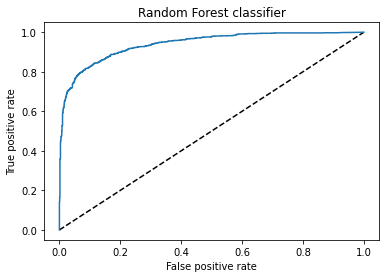

0.860046203658305

In [117]:
#Random Forest
predrfc_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predrfc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

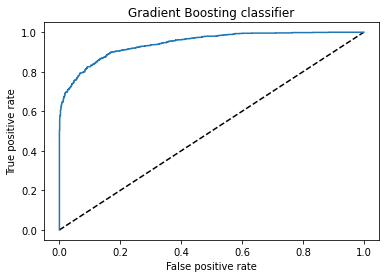

0.8636329503641961

In [118]:
#GradientBoosting
predgb_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predgb_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting classifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test))
auc_score

AUC score of the Gradient Boosting model is 86.36

In [119]:
import pickle
filename="Customer Churn Prediction.pkl"
pickle.dump(gb,open(filename, 'wb'))

Conclusion

In [120]:
model=pickle.load(open("Customer Churn Prediction.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  86.35778635778635


In [121]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330
Predicted,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
Original,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
